## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd



Using TensorFlow backend.


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
project_path ="/content/drive/My Drive/Dog_Breed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+ 'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path +'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
df_label= pd.read_csv( '/content/labels.csv')

In [9]:
df_label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [0]:
breed_count = df_label['breed'].value_counts()


In [11]:
breed_count

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [12]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
int_encoder = label_encoder.fit_transform(df_label['breed'])
print(int_encoder)

[19 37 85 ...  3 75 28]


In [0]:
import keras
y = keras.utils.to_categorical(int_encoder,num_classes=None, dtype='int')

In [15]:
y[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows = 128
img_cols = 128
num_channel = 1


In [17]:


from tqdm import tqdm
import cv2
x_feature = []
y_feature = []

for f, img in tqdm (df_label.values): # f for format, jpg
  train_img = cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize = cv2.resize(train_img, (img_rows,img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)

100%|██████████| 10222/10222 [00:28<00:00, 359.24it/s]


In [0]:
import numpy as np
y_array = label_encoder.transform(y_feature)

y_dog = keras.utils.to_categorical(y_array,num_classes=None, dtype='int')

In [19]:
y_dog[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
y_dog.shape

(10222, 120)

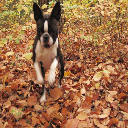

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0] 
 19 
 boston_bull


In [21]:
# checking the images and labels
from google.colab.patches import cv2_imshow
img = cv2_imshow(x_feature[0])
print (y_dog[0],'\n',y_array[0],'\n',y_feature[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [22]:
x_train_data = np.array(x_feature)/255
print(x_train_data.shape)

(10222, 128, 128, 3)


In [23]:
x_train_data_exp = np.expand_dims(x_train_data, axis=1)
print(x_train_data_exp[1,:].shape)

(1, 128, 128, 3)


### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_train_data,y_dog,test_size=.20,random_state=2)


In [25]:
print(train_x.shape)
print(test_x.shape)

(8177, 128, 128, 3)
(2045, 128, 128, 3)


In [26]:
print(train_y.shape)
print(test_y.shape)

(8177, 120)
(2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [27]:
df_submission = pd.read_csv('/content/sample_submission.csv')
test_img = df_submission['id']
df_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

Run the below code to load the test image files in x_test_feature

In [28]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:28<00:00, 367.95it/s]


Normalize the test data and convert it into 4 dimensions

In [29]:
x_test_data = np.array(x_test_feature,np.float32)/255
print(x_test_data.shape)
x_test_data_exp = np.expand_dims(x_test_data, axis=1)
print(x_test_data_exp.shape)

(10357, 128, 128, 3)
(10357, 1, 128, 128, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
 
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
#normalize data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model.add(Conv2D(34,kernel_size=5,activation='relu',input_shape= (img_rows,img_cols,3,)))

#Add second convolutional layer
model.add(Conv2D(64,kernel_size=3,activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(Flatten())

In [0]:
#1st Dense layer
model.add(Dense(256, activation='relu'))

#Output layer
model.add(Dense(120, activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
history = model.fit(train_x,train_y,          
          validation_data=(test_x,test_y),
          epochs=10,
          batch_size=128,initial_epoch=0)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 6.6507 - acc: 0.0092 - val_loss: 4.7875 - val_acc: 0.0068
Epoch 2/10
8177/8177 [==============================] - 8s 1000us/sample - loss: 4.7841 - acc: 0.0152 - val_loss: 4.7867 - val_acc: 0.0093
Epoch 3/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 4.7647 - acc: 0.0192 - val_loss: 4.7763 - val_acc: 0.0127
Epoch 4/10
8177/8177 [==============================] - 8s 999us/sample - loss: 4.5895 - acc: 0.0388 - val_loss: 4.7093 - val_acc: 0.0186
Epoch 5/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 3.8557 - acc: 0.1468 - val_loss: 4.8591 - val_acc: 0.0215
Epoch 6/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 2.0528 - acc: 0.5196 - val_loss: 5.7463 - val_acc: 0.0284
Epoch 7/10
8177/8177 [===========================

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras_preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [0]:
train_datagen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = train_datagen.flow(train_x,y=train_y,batch_size=32)
test_generator = test_datagen.flow(test_x,y=test_y,batch_size=32)

In [0]:
model_1 = tf.keras.models.Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu',  padding='same',input_shape=(128,128,3)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same', ))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (3, 3), activation='relu', padding='same' ))
model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(120, activation='softmax'))

In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [40]:
model_1.fit_generator(train_generator, 
                          epochs=10,
                          steps_per_epoch= train_x.shape[0]//32,
                          validation_data=test_generator,
                          validation_steps = test_y.shape[0]//32)

Epoch 1/10
255/255 [==============================] - 28s 111ms/step - loss: 4.7866 - acc: 0.0102 - val_loss: 4.7862 - val_acc: 0.0114
Epoch 2/10
255/255 [==============================] - 28s 109ms/step - loss: 4.7811 - acc: 0.0115 - val_loss: 4.7871 - val_acc: 0.0114
Epoch 3/10
255/255 [==============================] - 28s 110ms/step - loss: 4.7786 - acc: 0.0114 - val_loss: 4.7890 - val_acc: 0.0114
Epoch 4/10
255/255 [==============================] - 27s 108ms/step - loss: 4.7771 - acc: 0.0119 - val_loss: 4.7899 - val_acc: 0.0114
Epoch 5/10
255/255 [==============================] - 28s 109ms/step - loss: 4.7768 - acc: 0.0120 - val_loss: 4.7906 - val_acc: 0.0114
Epoch 6/10
255/255 [==============================] - 27s 107ms/step - loss: 4.7775 - acc: 0.0117 - val_loss: 4.7901 - val_acc: 0.0114
Epoch 7/10
255/255 [==============================] - 28s 108ms/step - loss: 4.7768 - acc: 0.0123 - val_loss: 4.7905 - val_acc: 0.0114
Epoch 8/10
255/255 [==============================] - 2

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [42]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
model_input = base_model.output
model_input= Flatten()(model_input)
model_input= Dense(1024,activation='relu')(model_input) #1st dense layer
model_input=Dense(256,activation='relu')(model_input) # 2nd dense layer 
prediction=Dense(120,activation='softmax')(model_input)

In [0]:
from tensorflow.keras.models import Model
final_model=Model(inputs=base_model.input,outputs=prediction)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [45]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in final_model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in final_model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_1
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d
False
flatten_2
False
dense_4
True
dense_5
True
dense_6
True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [46]:
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(lr=0.01)
final_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [47]:
history_final_model= final_model.fit(train_x,train_y,          
          validation_data=(test_x,test_y),
          epochs=10,
          batch_size=128,initial_epoch=0)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 12s 1ms/sample - loss: 6.1517 - acc: 0.0159 - val_loss: 4.7985 - val_acc: 0.0161
Epoch 2/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 4.4489 - acc: 0.0410 - val_loss: 4.3348 - val_acc: 0.0509
Epoch 3/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 4.1025 - acc: 0.0720 - val_loss: 4.8392 - val_acc: 0.0513
Epoch 4/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 3.8704 - acc: 0.1060 - val_loss: 4.0447 - val_acc: 0.0993
Epoch 5/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 3.6648 - acc: 0.1257 - val_loss: 3.9364 - val_acc: 0.1032
Epoch 6/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 3.5618 - acc: 0.1465 - val_loss: 3.7296 - val_acc: 0.1369
Epoch 7/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 3.4643 - acc: 0.1696 - val_loss: 3.6011 - val_acc: 0.1462

In [48]:
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(lr=0.01)
final_model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [49]:
history_final_model1= final_model.fit(train_x,train_y,          
          validation_data=(test_x,test_y),
          epochs=10,
          batch_size=128,initial_epoch=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.0364 - acc: 0.9916 - val_loss: 0.0427 - val_acc: 0.9913
Epoch 2/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.0336 - acc: 0.9918 - val_loss: 0.0388 - val_acc: 0.9917
Epoch 3/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.0333 - acc: 0.9919 - val_loss: 0.0416 - val_acc: 0.9914
Epoch 4/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.0328 - acc: 0.9919 - val_loss: 0.0386 - val_acc: 0.9915
Epoch 5/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.0325 - acc: 0.9919 - val_loss: 0.0441 - val_acc: 0.9913
Epoch 6/10
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.0321 - acc: 0.9920 - val_loss: 0.0427 - val_acc: 0.9913
Epoch 7/10
8177/8177 [====================

In [0]:
With binary crossentropy getting maximum accuracy, but as our label are multiclass we cant use binary crossentropy